<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/R%20program%20lab11_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 11: Random Forests (30 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking. 

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font> (3 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. Show the first few lines of `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `test`. Show the first few lines of `test`. Make sure you did this correctly. How many rows does `test` contain? Answer in a complete sentence.

Note: In machine learning, datasets are typically divided into training, validation, and testing sets
  * training set - a dataset used to fit your model
  * validation set - the dataset used to select your "best" model (e.g., using adjusted R-squared or MSE)
  * testing set - the dataset used to assess accuracy of your final model

Task 0.3 will be used as your testing set.

In [ ]:
#0.1
dat <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
head(dat)

#0.2
dat1 <- na.omit(COPDGene)
head(dat1)
nrow(dat1)

#0.3
test <- dat[which(is.na(dat$FEV1_phase2)),]
head(test)
nrow(test)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924
7,10025W,2008,2/15/2008,68.9,Male,Black or African American,168.9,51.0,120,60,⋯,6.4421,51.156200,-1.0000,-1.00000,-906.021,-1.000,0.27,0.718,2.697,0.596


[1] 4000

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.00590,-1.0000,-1.0000,-841.880,-1.000,0.43,1.288,3.022,NA
8,10031R,2008,2/15/2008,60.9,Male,White,184.8,83.6,124,69,⋯,8.8889,27.52070,4.4364,44.8584,-878.354,-772.429,0.51,2.408,4.725,NA
9,10032T,2008,3/15/2008,60.9,Female,White,162.5,89.4,156,88,⋯,5.3977,7.72520,2.9650,31.1250,-858.979,-745.539,0.59,1.476,2.506,NA
12,10052Z,2008,3/15/2008,47.5,Male,White,178.0,86.6,125,84,⋯,8.2246,2.22613,5.0391,33.8255,-854.198,-778.834,0.45,1.718,3.796,NA
13,10055F,2008,3/15/2008,69.0,Male,Black or African American,178.0,90.7,168,100,⋯,4.9060,1.94520,1.9057,10.6835,-823.746,-638.442,0.73,2.917,3.999,NA
15,10057J,2008,4/15/2008,56.8,Male,White,170.0,79.7,131,68,⋯,7.0991,7.52536,4.0210,27.8384,-856.567,-756.317,0.51,2.266,4.425,NA


[1] 1747

0.2 After removing NA dat1 contains 4000 rows.

0.3  test has 1747 rows.

<br>

---

<br>






####<font color=red>Task 1</font>  (4 points)

1. Randomly partition `dat1` into training (`train`) and validation (`valid`) sets as done in lecture. It is convention to randomly select 70%-80% of your data for training and the remaining data for validation.
  * A seed is not necessary in this case.
  * None of the rows in the training dataset should be in the validation dataset

In [ ]:
#1.1
samp <- sample(1:nrow(dat1), size = nrow(dat1)*0.7 )
train <- dat1[samp,  ]
nrow(train)


valid <- dat1[-samp,]
nrow(valid)

[1] 2800

[1] 1200

<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Fit a random forest using the `train` dataset with `FEV1_phase2` as the dependent variable (y-variable).
  * Try many different variable combinations
  * Try altering the hyperparameters of the random forest (e.g., `ntree`, `mtry`, `nodesize`, `maxnodes`)
  * Set `importance = TRUE` when fitting the random forest to determine variable importance in a later task
  * Note that you must be more systematic with how you determine you hyperparameters due to the larger sample size - this is part of the challenge!
2. Determine the best random forest model (i.e. the random forest that produces the smalles MSE on the validation set)


In [ ]:
#2.1
install.packages("randomForest")
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
fit <- randomForest(FEV1_phase2 ~. ,
                    data=train,
                    importance = TRUE,
                    ntree = 500,
                    mtry = 4,
                    nodesize=2,
                    maxnodes=NULL,
                  )

In [ ]:
#2.2
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}

mse(valid$FEV1_phase2, predict(fit, newdata = valid))

[1] 0.09197682

<br>

---

<br>






####<font color=red>Task 3</font>  (4 points)

1. Explore the importance of the variables from your random forest model using the barplot covered in lecture. 

2. What are the three most important variables of your model? Does this make sense? Speculate as to why these these variables are important for prediction breathing ability (FEV1_phase2) in complete sentences. Do your best!




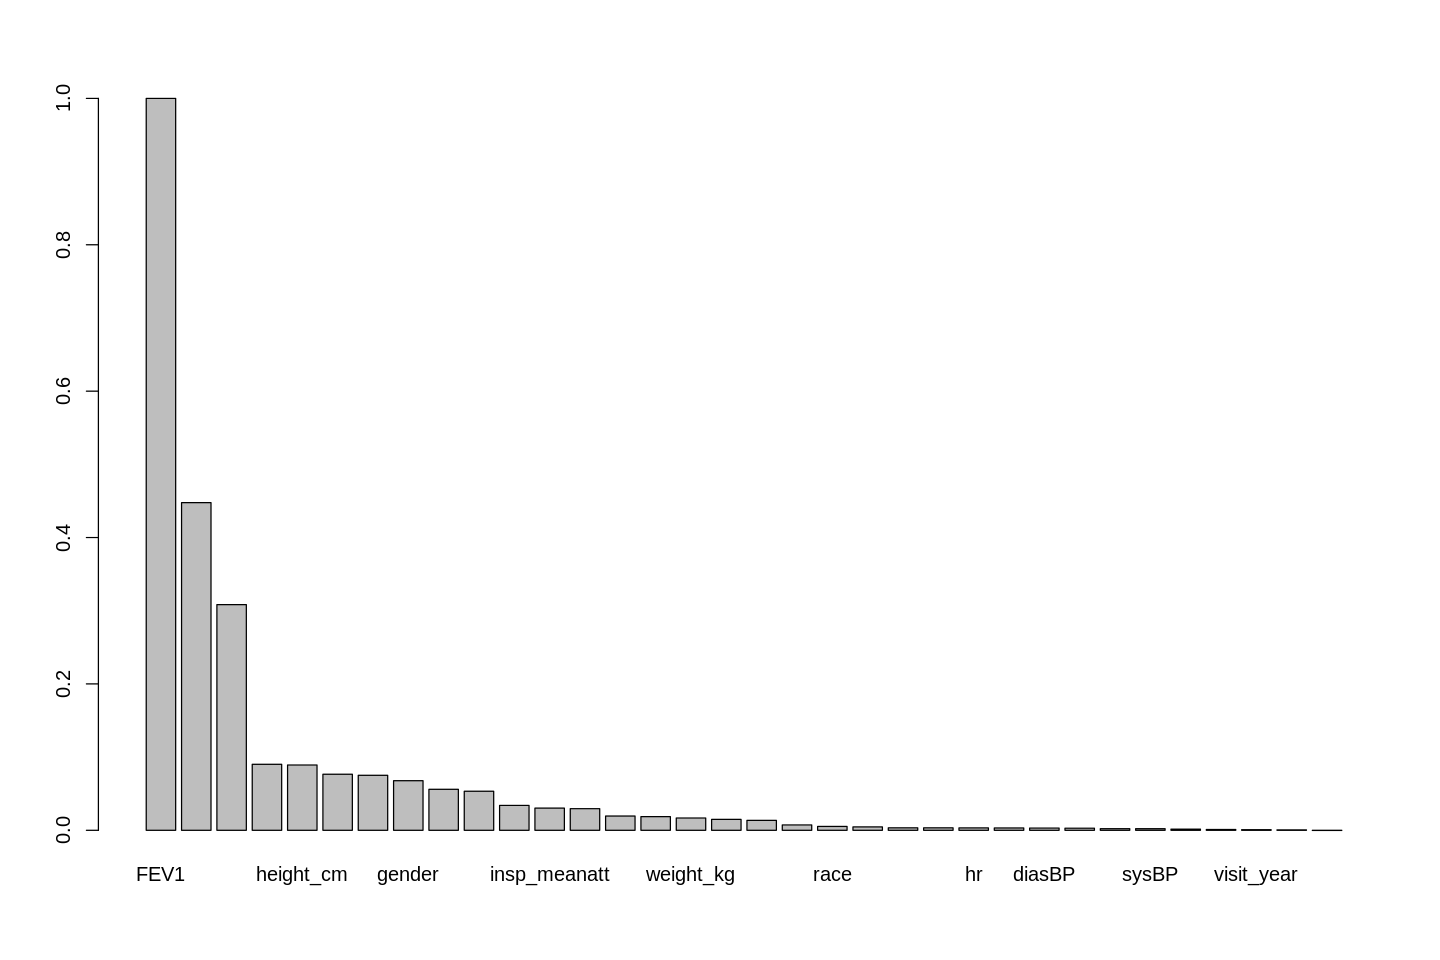

In [ ]:
#3.1
options(repr.plot.width = 12, repr.plot.height = 8)

importance <- fit$importance[, 1]
importance <- sort(importance, decreasing = TRUE) / max(importance)
barplot(importance)

3.2 FEV1,FVC and FEvi_FVC_ratio are the most important variables. Since those are correlated with each other by ratio. 

<br>

---

<br>






####<font color=red>Task 4</font>  (3 points)

1. Using your final model, predict `FEV1_phase2` on your `train` dataset. Show the MSE.
2. Using your final model, predict `FEV1_phase2` on your `valid` dataset. Show the MSE.
3. Is your model overfitting or underfitting?




In [ ]:
#4.1
FEV1_phase2_predictions <- predict(fit, train)
mse(train$FEV1_phase2, predict(fit, newdata = train))

[1] 0.0143653

In [ ]:
#4.2
FEV1_phase2_predictions <- predict(fit, valid)
mse(valid$FEV1_phase2, predict(fit, newdata = valid))

[1] 0.09197682

4.3 Overfitting.

<br>

---

<br>






####<font color=red>Task 5</font>  (7 points)

1. Using your final model, predict `FEV1_phase2` on your `test` dataset and store as `FEV1_phase2_predictions`.

2. Create a dataframe with two columns: the `sid` column from `test` and the `FEV1_phase2_predictions` from Task 2.2.


```
preds <- data.frame(sid = test$sid, FEV1_phase2_predictions)
```

3. Write the csv file to disk for submission to Canvas.


```
write.csv(preds, 'copd_predictions.csv')
```

The `write.csv` function writes the predictions to a csv file in Google Drive. The file is located under the folder icon on the left side of your screen.

4. Open the folder icon, then right click on the file and download the predictions to your computer for submission to Canvas.





In [ ]:
#5.1
FEV1_phase2_predictions <- predict(fit, newdata = test)
#5.2
preds <- data.frame(sid = test$sid, FEV1_phase2_predictions)
#5.3
write.csv(preds, 'copd_predictions.csv')

ERROR: ignored